In [1]:
from tensorflow.keras.models import load_model
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Графіки

In [2]:
dense_nadam = load_model(dense_nadam)
dense_adamw = load_model(dense_adamw)
dense_lion = load_model(dense_lion)
mobile_nadam = load_model(mobile_nadam)
mobile_adamw = load_model(mobile_adamw)
mobile_lion = load_model(mobile_lion)
xcep_adamw = load_model(xcep_adamw)
xcep_nadam = load_model(xcep_nadam)

In [4]:
def create_dataframe_from_directory(directory):
    filepaths = []
    labels = []
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        if os.path.isdir(label_dir):  # Проверяем, что это действительно папка
            for filename in os.listdir(label_dir):
                filepath = os.path.join(label_dir, filename)
                filepaths.append(filepath)
                labels.append(label)  # Используем название папки как метку
    df = pd.DataFrame({'Filepaths': filepaths, 'Labels': labels})
    return df

train_dir = 'D:\\diploma\\original_dataset\\train'
test_dir = 'D:\\diploma\\original_dataset\\test'
valid_dir = 'D:\\diploma\\original_dataset\\validation'

In [5]:
train_df = create_dataframe_from_directory(train_dir)
valid_df = create_dataframe_from_directory(valid_dir)
test_df = create_dataframe_from_directory(test_dir)

valid_datagen = ImageDataGenerator(rescale=1./255)

valid_generator = valid_datagen.flow_from_dataframe(
    dataframe=valid_df,
    x_col='Filepaths',
    y_col='Labels',
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    shuffle=True,
    seed=42,
    validation_split=0.1
)


Found 5432 validated image filenames belonging to 38 classes.


In [3]:
model_paths = {
    'DenseNet Nadam': '\\diploma\\train models\\DenseNet_Nadam.h5',
    'DenseNet AdamW': '\\diploma\\train models\\DenseNet+AW.h5',
    'DenseNet Lion': '\\diploma\\train models\\DenseNet+L(0.85).h5',
    'MobileNet Nadam': '\\diploma\\train models\\MobileNet+Nadam.h5',
    'MobileNet AdamW': '\\diploma\\train models\\MobuleNet+AdamW.h5',
    'MobileNet Lion': '\\diploma\\train models\\model_Mob_L.h5',
    'Xception AdamW': '\\diploma\\train models\\DenseNet+AW.h5',
    'Xception Nadam': '\\diploma\\train models\\model_Xcep_N.h5'
}

In [4]:
def evaluate_models(model_paths, valid_generator):
    results = {'Model': [], 'Accuracy': [], 'Loss': []}
    for model_name, model_path in model_paths.items():
        model = load_model(model_path)
        loss, accuracy = model.evaluate(valid_generator)
        results['Model'].append(model_name)
        results['Accuracy'].append(accuracy)
        results['Loss'].append(loss)
    return pd.DataFrame(results)

In [9]:
results_df = evaluate_models(model_paths, valid_generator)

340/340 [==============================] - 247s 725ms/step - loss: 0.2006 - accuracy: 0.9369


C:\Users\Ann\AppData\Local\Temp\ipykernel_4112\3343229017.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(results_df['Model'], rotation=45, ha='right')


[Text(0, 0, 'DenseNet Nadam'),
 Text(1, 0, 'DenseNet AdamW'),
 Text(2, 0, 'DenseNet Lion'),
 Text(3, 0, 'MobileNet Nadam'),
 Text(4, 0, 'MobileNet AdamW'),
 Text(5, 0, 'MobileNet Lion'),
 Text(6, 0, 'Xception AdamW'),
 Text(7, 0, 'Xception Nadam')]

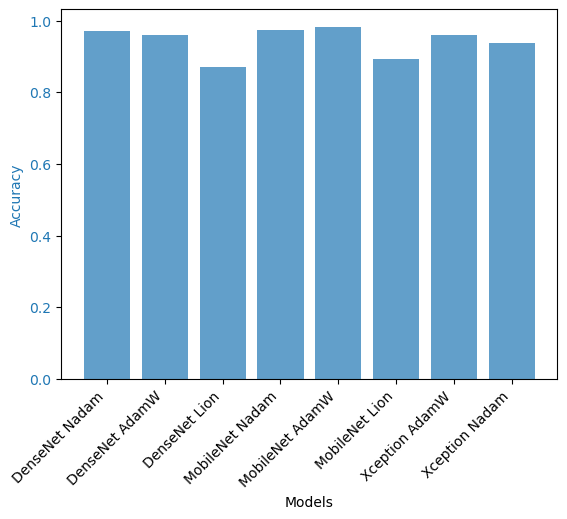

In [10]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('Models')
ax1.set_ylabel('Accuracy', color='tab:blue')
ax1.bar(results_df['Model'], results_df['Accuracy'], color='tab:blue', alpha=0.7)
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_xticklabels(results_df['Model'], rotation=45, ha='right')

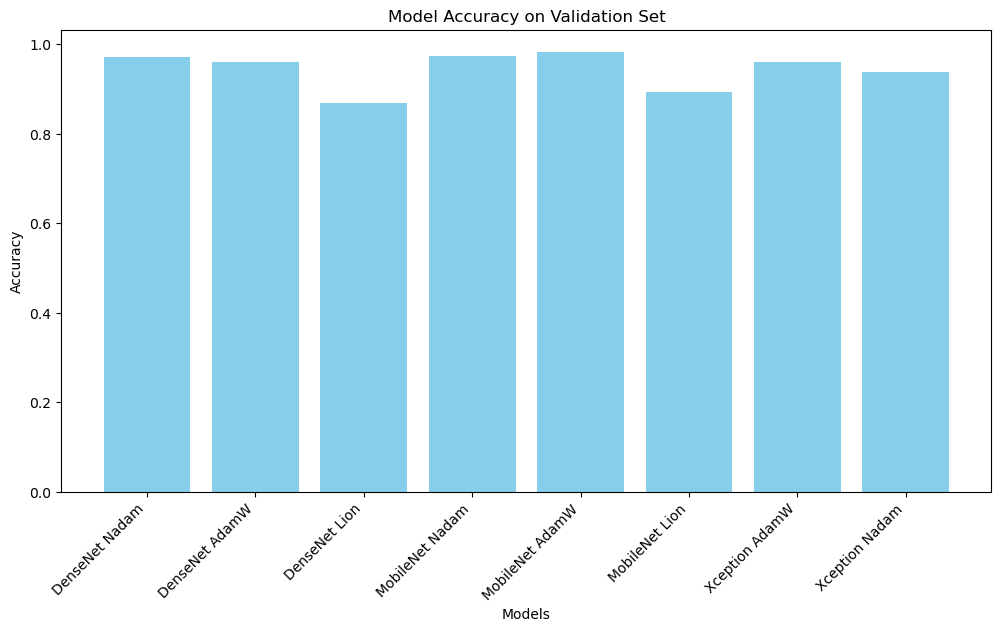

In [12]:
plt.figure(figsize=(12, 6))
plt.bar(results_df['Model'], results_df['Accuracy'], color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy on Validation Set')
plt.xticks(rotation=45, ha='right')
plt.show()

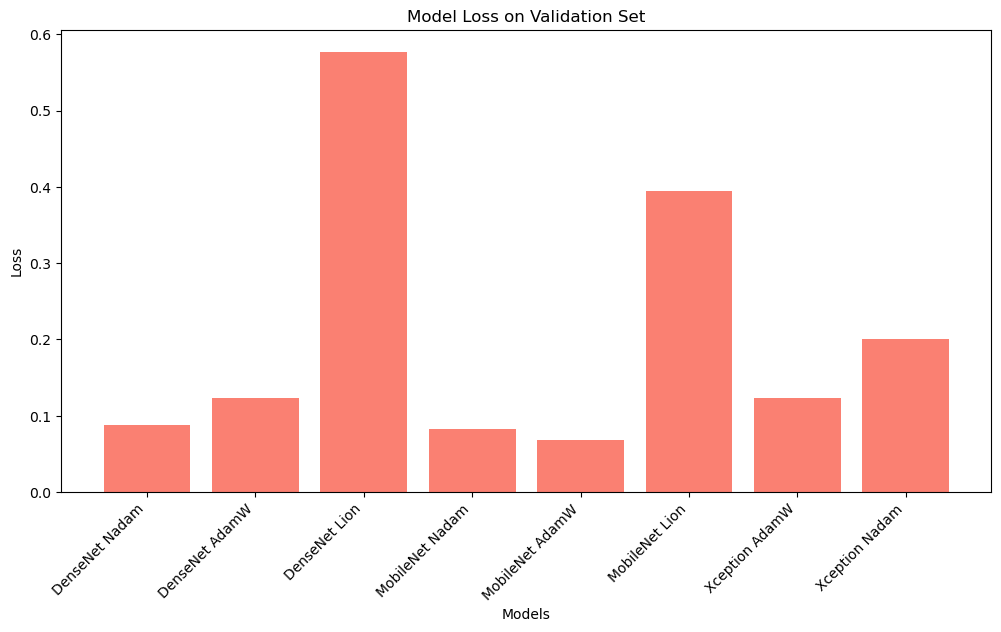

In [13]:
plt.figure(figsize=(12, 6))
plt.bar(results_df['Model'], results_df['Loss'], color='salmon')
plt.xlabel('Models')
plt.ylabel('Loss')
plt.title('Model Loss on Validation Set')
plt.xticks(rotation=45, ha='right')
plt.show()

In [3]:
class_labels = {
    'Apple___Apple_scab': 0, 
    'Apple___Black_rot': 1, 
    'Apple___Cedar_apple_rust': 2, 
    'Apple___healthy': 3, 
    'Blueberry___healthy': 4, 
    'Cherry_(including_sour)___Powdery_mildew': 5, 
    'Cherry_(including_sour)___healthy': 6, 
    'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7, 
    'Corn_(maize)___Common_rust_': 8, 
    'Corn_(maize)___Northern_Leaf_Blight': 9, 
    'Corn_(maize)___healthy': 10, 
    'Grape___Black_rot': 11, 
    'Grape___Esca_(Black_Measles)': 12, 
    'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13, 
    'Grape___healthy': 14, 
    'Orange___Haunglongbing_(Citrus_greening)': 15, 
    'Peach___Bacterial_spot': 16, 
    'Peach___healthy': 17, 
    'Pepper,_bell___Bacterial_spot': 18, 
    'Pepper,_bell___healthy': 19, 
    'Potato___Early_blight': 20, 
    'Potato___Late_blight': 21, 
    'Potato___healthy': 22, 
    'Raspberry___healthy': 23, 
    'Soybean___healthy': 24, 
    'Squash___Powdery_mildew': 25, 
    'Strawberry___Leaf_scorch': 26, 
    'Strawberry___healthy': 27, 
    'Tomato___Bacterial_spot': 28, 
    'Tomato___Early_blight': 29, 
    'Tomato___Late_blight': 30, 
    'Tomato___Leaf_Mold': 31, 
    'Tomato___Septoria_leaf_spot': 32, 
    'Tomato___Spider_mites Two-spotted_spider_mite': 33, 
    'Tomato___Target_Spot': 34, 
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 35, 
    'Tomato___Tomato_mosaic_virus': 36, 
    'Tomato___healthy': 37
}

# Тестування зображення 

In [4]:
from tensorflow.keras.applications.mobilenet import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img


In [5]:
dense_nadam_model = load_model('\\diploma\\train models\\DenseNet_Nadam.h5')
dense_adamw_model = load_model('\\diploma\\train models\\DenseNet+AW.h5')
dense_lion_model = load_model('\\diploma\\train models\\DenseNet+L(0.85).h5')
mobile_nadam_model = load_model('\\diploma\\train models\\MobileNet+Nadam.h5')
mobile_adamw_model = load_model('\\diploma\\train models\\MobuleNet+AdamW.h5')
mobile_lion_model = load_model('\\diploma\\train models\\model_Mob_L.h5')
xcep_adamw_model = load_model('\\diploma\\train models\\DenseNet+AW.h5')
xcep_nadam_model = load_model('\\diploma\\train models\\model_Xcep_N.h5')

In [6]:
models = {
    'dense_nadam': dense_nadam_model,
    'dense_adamw': dense_adamw_model,
    'dense_lion': dense_lion_model,
    'mobile_nadam': mobile_nadam_model,
    'mobile_adamw': mobile_adamw_model,
    'mobile_lion': mobile_lion_model,
    'xcep_adamw': xcep_adamw_model,
    'xcep_nadam': xcep_nadam_model
}

In [7]:
labels_to_classes = {v: k for k, v in class_labels.items()}

In [8]:
def load_and_preprocess_image(img_path, target_size):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  
    return img_array


In [9]:
# best
images = {
    'blueberry': r'train models\photo 2\blueberry.jpg',
    'corn': r'train models\photo 2\corn.jpg',
    'tomato': r'train models\photo\tomato.jpg',
    'pepper': r'train models\photo\pepper.jpg',
    'grape': r'train models\photo\grape.jpg',
    'potato': r'train models\photo\potato.webp'
}
    

# 1

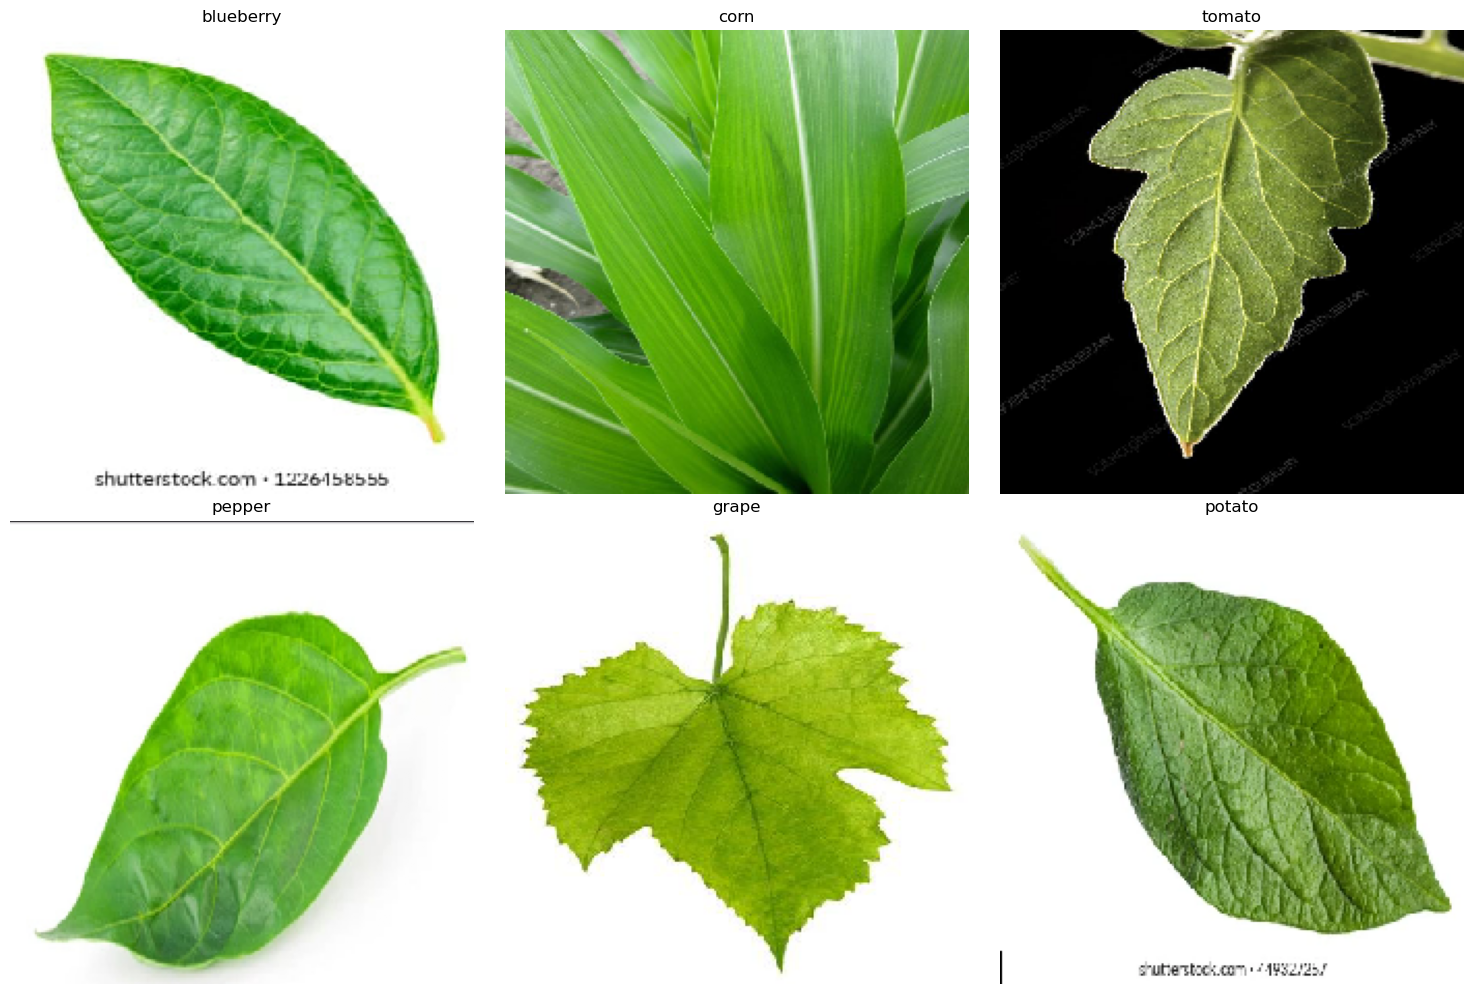

Predictions using dense_nadam:
1/1 [==============================] - 4s 4s/step
blueberry: Class 4 (Blueberry___healthy), Confidence 99.94%
1/1 [==============================] - 0s 170ms/step
corn: Class 10 (Corn_(maize)___healthy), Confidence 97.89%
1/1 [==============================] - 0s 159ms/step
tomato: Class 30 (Tomato___Late_blight), Confidence 55.37%
1/1 [==============================] - 0s 173ms/step
pepper: Class 19 (Pepper,_bell___healthy), Confidence 68.11%
1/1 [==============================] - 0s 168ms/step
grape: Class 14 (Grape___healthy), Confidence 52.12%
1/1 [==============================] - 0s 187ms/step
potato: Class 21 (Potato___Late_blight), Confidence 96.79%


Predictions using dense_adamw:
1/1 [==============================] - 4s 4s/step
blueberry: Class 4 (Blueberry___healthy), Confidence 99.99%
1/1 [==============================] - 0s 168ms/step
corn: Class 10 (Corn_(maize)___healthy), Confidence 39.33%
1/1 [==============================] - 0s 144ms/

In [10]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for ax, (img_name, img_path) in zip(axes, images.items()):
    # Предобработка изображения
    target_size = (224, 224)
    img_array = load_and_preprocess_image(img_path, target_size)
    
    # Отображение предобработанного изображения
    img = np.squeeze(img_array, axis=0)  # Удаление оси пакета
    ax.imshow(img)
    ax.set_title(img_name)
    ax.axis('off')

plt.tight_layout()
plt.show()

# Выполнение предсказаний и вывод результатов
for model_name, model in models.items():
    print(f"Predictions using {model_name}:")
    for img_name, img_path in images.items():
        img_array = load_and_preprocess_image(img_path, (224, 224))
        prediction = model.predict(img_array)
        predicted_class = np.argmax(prediction, axis=1)[0]
        confidence = np.max(prediction) * 100  # вероятность предсказанного класса в процентах
        class_name = labels_to_classes[predicted_class]
        print(f"{img_name}: Class {predicted_class} ({class_name}), Confidence {confidence:.2f}%")
    print("\n")